# **유한차분법**

In [1]:
# 사용할 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

## **1계 미분**

### 함수 생성

In [2]:
def function(x) :
  return 3*np.power(x, 2) + 2*x + 1

### 함수 시각화

In [3]:
x = np.arange(0, 10, 1e-3)
y = function(x)

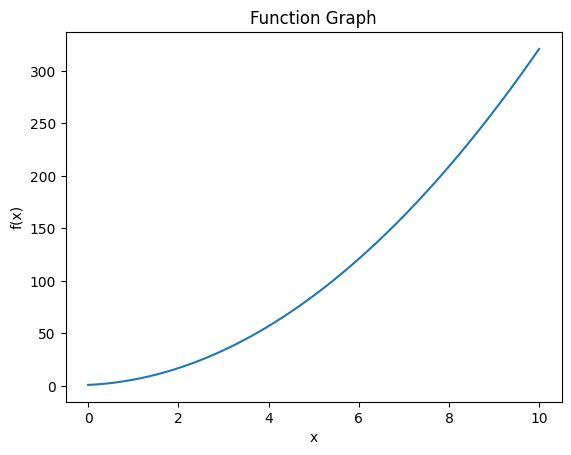

In [4]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function Graph")
plt.show()

### **First Forward Difference Approximation (FFDA)**

#### Gradient 계산

In [5]:
def FFDA(fi, fi_plus_1, delta) :
  # 코드를 작성해주세요
  gradient = (fi_plus_1 - fi) / delta
  return gradient

In [6]:
x_input, delta = 5, 1e-3

In [7]:
fi, fi_plus_1 = function(x_input), function(x_input + delta)

In [8]:
gradient = FFDA(fi, fi_plus_1, delta)
print(f"Gradient : {gradient:.4f}")

Gradient : 32.0030


##### 정답

In [9]:
def FFDA(fi, fi_plus_1, delta) :
  gradient = (fi_plus_1 - fi) / delta
  return gradient

#### Gradient 값 시각화

In [10]:
def linear(x, gradient, intercept) :
  return gradient*x + intercept

In [11]:
intercept = fi - gradient*x_input

In [12]:
difference = linear(x, gradient, intercept)

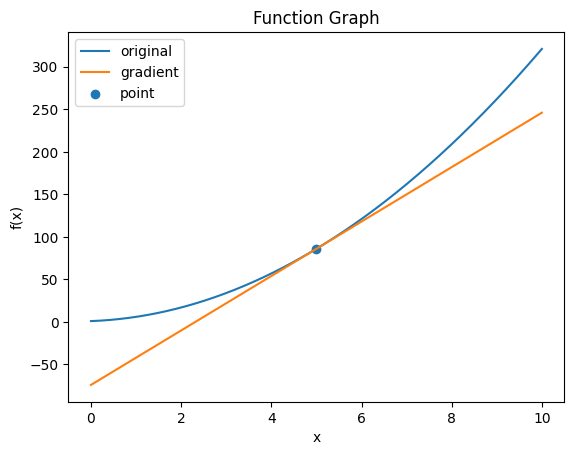

In [13]:
plt.plot(x, y, label="original")
plt.plot(x, difference, label="gradient")
plt.scatter(x_input, function(x_input), label="point")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function Graph")
plt.legend(loc="best")
plt.show()

### **First Backward Difference Approximation (FBDA)**

#### Gradient 계산

In [14]:
def FBDA(fi, fi_minus_1, delta) :
  # 코드를 작성해주세요
  gradient = (fi - fi_minus_1) / delta
  return gradient

In [15]:
x_input, delta = 5, 1e-3

In [16]:
fi, fi_minus_1 = function(x_input), function(x_input - delta)

In [17]:
gradient = FBDA(fi, fi_minus_1, delta)
print(f"Gradient : {gradient:.4f}")

Gradient : 31.9970


##### 정답

In [ ]:
def FBDA(fi, fi_minus_1, delta) :
  gradient = (fi - fi_minus_1) / delta
  return gradient

#### Gradient 값 시각화

In [18]:
intercept = fi - gradient*x_input

In [19]:
difference = linear(x, gradient, intercept)

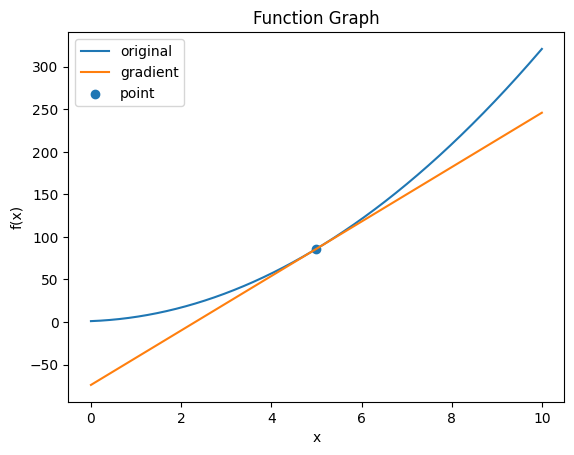

In [20]:
plt.plot(x, y, label="original")
plt.plot(x, difference, label="gradient")
plt.scatter(x_input, function(x_input), label="point")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function Graph")
plt.legend(loc = "best")
plt.show()

### **Central Difference Approximation (CDA)**

#### Gradient 계산

In [28]:
def CDA(fi_plus_1, fi_minus_1, delta) :
  # 코드를 작성해주세요
  gradient = (fi_plus_1 - fi_minus_1) / (2*delta)
  return gradient

In [29]:
x_input, delta = 5, 1e-3

In [30]:
fi_plus_1, fi_minus_1 = function(x_input + delta), function(x_input - delta)

In [31]:
gradient = CDA(fi_plus_1, fi_minus_1, delta)
print(f"Gradient : {gradient:.4f}")

Gradient : 32.0000


##### 정답

In [32]:
def CDA(fi_plus_1, fi_minus_1, delta) :
  gradient = (fi_plus_1 - fi_minus_1) / (2*delta)
  return gradient

#### Gradient 값 시각화

In [33]:
intercept = fi - gradient * x_input

In [34]:
difference = linear(x, gradient, intercept)

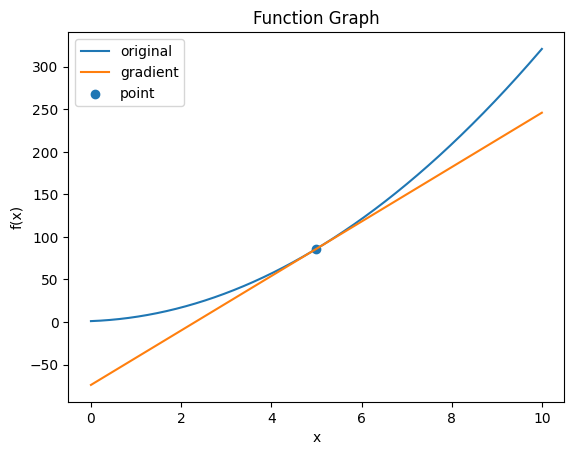

In [35]:
plt.plot(x, y, label="original")
plt.plot(x, difference, label="gradient")
plt.scatter(x_input, function(x_input), label="point")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function Graph")
plt.legend(loc = "best")
plt.show()

### **적용 예시**

#### 조화 함수 (Harmonic Function)

#### Sine 함수 샘플링 및 시각화

In [36]:
delta = 1e-2
x = np.arange(0, 10, delta)
y = np.sin(x)

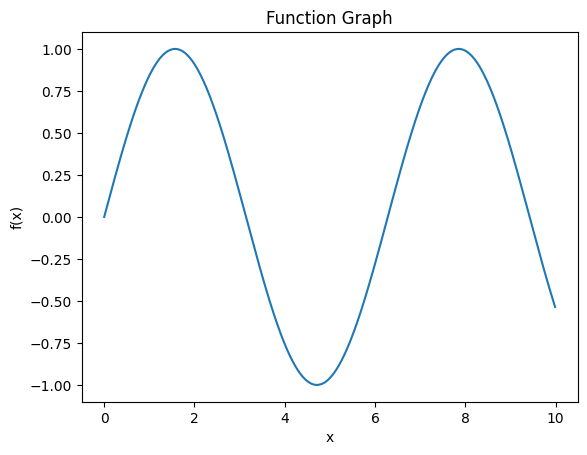

In [37]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function Graph")
plt.show()

#### **각 방법을 활용한 Gradient 계산**

In [38]:
x_plus_1, x_minus_1 = x + delta, x - delta
y_plus_1, y_minus_1 = np.sin(x_plus_1), np.sin(x_minus_1)

In [39]:
gradient_ffda = FFDA(y, y_plus_1, delta)
gradient_fbda = FBDA(y, y_minus_1, delta)
gradient_cda = CDA(y_plus_1, y_minus_1, delta)

#### **Gradient 값 시각화**

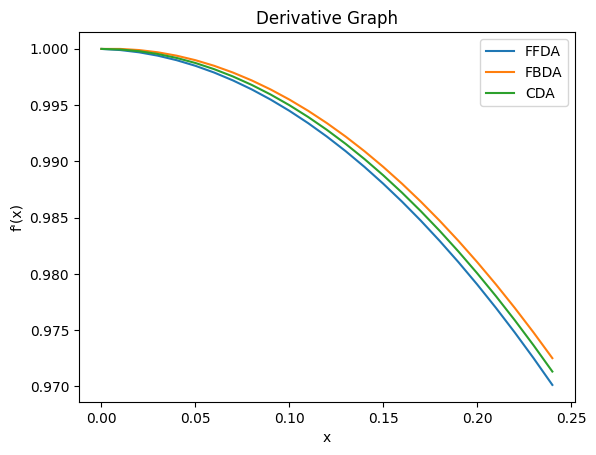

In [40]:
plt.plot(x[:25], gradient_ffda[:25], label="FFDA")
plt.plot(x[:25], gradient_fbda[:25], label="FBDA")
plt.plot(x[:25], gradient_cda[:25], label="CDA")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Derivative Graph")
plt.legend(loc = "best")
plt.show()

#### **RMSE 값 계산**

#### 정답 값과 예측 값 사이의 차이를 계산

In [41]:
def RMSE(y_hat, y_target) :
  # 코드를 작성해주세요
  loss = np.sqrt(np.mean(np.power(y_hat - y_target, 2)))
  return loss

In [42]:
rmse_ffda = RMSE(gradient_ffda, np.cos(x))
rmse_fbda = RMSE(gradient_fbda, np.cos(x))
rmse_cda = RMSE(gradient_cda, np.cos(x))

In [43]:
print(f"FFDA RMSE : {rmse_ffda:.8f}")
print(f"RBDA RMSE : {rmse_fbda:.8f}")
print(f"CDA RMSE : {rmse_cda:.8f}")

FFDA RMSE : 0.00345371
RBDA RMSE : 0.00345301
CDA RMSE : 0.00001205


##### 정답

In [44]:
def RMSE(y_hat, y_target) :
  loss = np.sqrt(np.mean(np.power(y_hat - y_target, 2)))
  return loss

## **2계 미분**

#### Gradient 계산

In [46]:
def SDFDA(fi_plus_2, fi_plus_1, fi, delta) :
  # 코드를 작성해주세요
  gradient = (fi_plus_2 - (2 * fi_plus_1) + fi) / (delta ** 2)
  return gradient

In [47]:
x_input, delta = 5, 1e-3

In [48]:
fi_plus_2, fi_plus_1, fi = function(x_input + 2*delta), function(x_input + delta), function(x_input)

In [49]:
gradient = SDFDA(fi_plus_2, fi_plus_1, fi, delta)
print(f"Gradient : {gradient:.8f}")

Gradient : 5.99999998


##### 정답

In [50]:
def SDFDA(fi_plus_2, fi_plus_1, fi, delta) :
  gradient = (fi_plus_2 - 2*fi_plus_1 + fi) / np.power(delta, 2)
  return gradient

### **적용 예시**

#### 조화 함수 (Harmonic Function)

#### Sine 함수 샘플링 및 시각화

In [51]:
delta = 1e-2
x = np.arange(0, 10, delta)
y = np.sin(x)

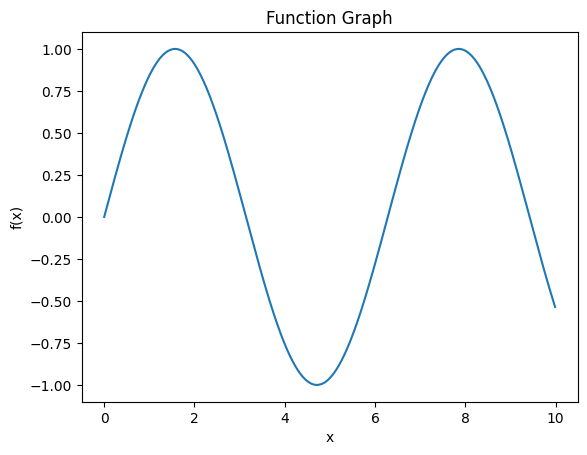

In [52]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function Graph")
plt.show()

#### **Gradient 계산**

In [53]:
x_plus_2, x_plus_1 = x + 2*delta, x + delta
yP2, y_plus_1 = np.sin(x_plus_2), np.sin(x_plus_1)

In [54]:
gradient = SDFDA(yP2, y_plus_1, y, delta)

#### **Gradient 값 시각화**

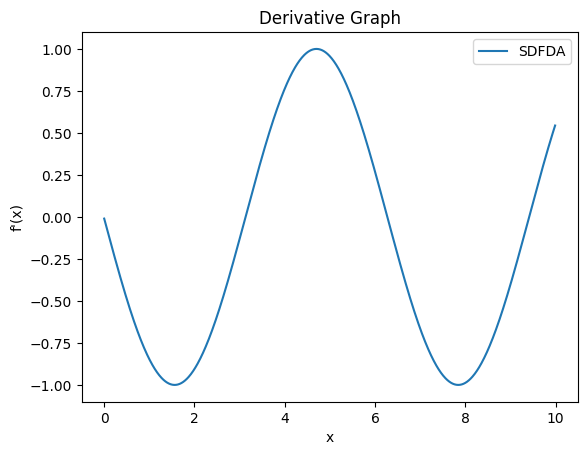

In [55]:
plt.plot(x, gradient, label="SDFDA")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Derivative Graph")
plt.legend(loc="best")
plt.show()

#### **RMSE 값 계산**

In [1]:
rmse = RMSE(gradient, -np.sin(x))

NameError: name 'RMSE' is not defined

In [57]:
print(f"RMSE : {rmse:.8f}")

RMSE : 0.00723043
